In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.preprocessing

In [2]:
Cat_sales=pd.read_csv('C:/Users/Sampoorna/Desktop/category_sales.csv',sep=",")
Cat_sales.head()

,store_id,units_sold,day_of_week,size_of_store,weather,store_age,renovation_or_not,category_update,discount,BOGO_offers,no_competitors_stores,price_index
0,1,207,Thursday,22120,36,245,1,1,17,4,3,Med
1,1,228,Tuesday,22120,40,245,1,0,18,5,2,High
2,1,241,Tuesday,22120,21,245,1,0,17,5,3,Med
3,1,245,Thursday,22120,35,245,1,0,16,1,3,High
4,1,262,Tuesday,22120,30,245,1,0,4,2,2,Low


In [3]:
## one hot encoding for price index
dummies=pd.get_dummies(Cat_sales['price_index'])
Cat_sales=pd.concat([Cat_sales,dummies],axis=1)
Cat_sales.drop(columns=['price_index'],inplace=True)

In [4]:
Cat_sales.head()

,store_id,units_sold,day_of_week,size_of_store,weather,store_age,renovation_or_not,category_update,discount,BOGO_offers,no_competitors_stores,High,Low,Med
0,1,207,Thursday,22120,36,245,1,1,17,4,3,0,0,1
1,1,228,Tuesday,22120,40,245,1,0,18,5,2,1,0,0
2,1,241,Tuesday,22120,21,245,1,0,17,5,3,0,0,1
3,1,245,Thursday,22120,35,245,1,0,16,1,3,1,0,0
4,1,262,Tuesday,22120,30,245,1,0,4,2,2,0,1,0


In [4]:
Cat_sales.groupby(['store_id','units_sold','day_of_week']).size()

store_id  units_sold  day_of_week
1         207         Thursday       1
          228         Tuesday        1
          241         Tuesday        1
          245         Thursday       1
          262         Tuesday        1
                                    ..
250       363         Tuesday        1
          368         Saturday       1
          380         Friday         1
          469         Friday         1
          488         Sunday         1
Length: 4967, dtype: int64

In [5]:
cnt_of_custom=Cat_sales.groupby(['store_id','units_sold','day_of_week'])
cnt_of_custom

In [29]:
cnt_of_custom.pivot_table(index=['units_sold'],columns='day_of_week',values='cnt_of_cust')

AttributeError: Cannot access callable attribute 'pivot_table' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [5]:
lag_units=pd.DataFrame(Cat_sales.groupby('store_id')['units_sold'].shift(1))
lag_units.head()

store_list=Cat_sales[['store_id']]
store_list1=pd.concat([store_list,lag_units],axis=1)

In [6]:
avg_store_units=Cat_sales.groupby('store_id')['units_sold'].mean().reset_index(name='avg_of_units_sold')

In [7]:
store_list2=store_list1.merge(avg_store_units,on='store_id',how='left')

In [8]:
store_list2['lag']=np.where(store_list2.units_sold.isna(),store_list2.avg_of_units_sold,store_list2.units_sold)

In [9]:
store_list2.head()

,store_id,units_sold,avg_of_units_sold,lag
0,1,NaN,345.095238,345.095238
1,1,207.0,345.095238,207.000000
2,1,228.0,345.095238,228.000000
3,1,241.0,345.095238,241.000000
4,1,245.0,345.095238,245.000000


In [10]:
lag=store_list2['lag']

In [11]:
Cat_sales=pd.concat([Cat_sales,lag],axis=1)
Cat_sales.head()

,store_id,units_sold,day_of_week,size_of_store,weather,store_age,renovation_or_not,category_update,discount,BOGO_offers,no_competitors_stores,High,Low,Med,lag
0,1,207,Thursday,22120,36,245,1,1,17,4,3,0,0,1,345.095238
1,1,228,Tuesday,22120,40,245,1,0,18,5,2,1,0,0,207.000000
2,1,241,Tuesday,22120,21,245,1,0,17,5,3,0,0,1,228.000000
3,1,245,Thursday,22120,35,245,1,0,16,1,3,1,0,0,241.000000
4,1,262,Tuesday,22120,30,245,1,0,4,2,2,0,1,0,245.000000


In [15]:
Cat_sales.groupby(['store_age','renovation_or_not']).size()

store_age  renovation_or_not
100        0                    27
104        0                    19
110        1                    19
136        1                    16
141        0                    29
                                ..
1473       1                    21
1479       0                    19
1486       0                    16
1488       1                    20
1489       1                    19
Length: 245, dtype: int64

In [12]:
## one hot encoding for day of week
dummies=pd.get_dummies(Cat_sales['day_of_week'])
Cat_sales1=pd.concat([Cat_sales,dummies],axis=1)
Cat_sales1.drop(columns=['day_of_week'],inplace=True)

In [17]:
Cat_sales.groupby('renovation_or_not')['store_age'].mean()

renovation_or_not
0    802.567680
1    832.444402
Name: store_age, dtype: float64

In [36]:
np.where(Cat_sales.renovation_or_not==0)

(array([  21,   22,   23, ..., 4978, 4979, 4980], dtype=int64),)

In [ ]:
##creating an interaction variable bwtween store_age and renovation or not

In [13]:
Y=Cat_sales1.iloc[:,1]
X=Cat_sales1.iloc[:,2:22]
Y.head()

0    207
1    228
2    241
3    245
4    262
Name: units_sold, dtype: int64

In [42]:
Cat_sales1.head()

,store_id,units_sold,size_of_store,weather,store_age,renovation_or_not,category_update,discount,BOGO_offers,no_competitors_stores,...,Low,Med,lag,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,207,22120,36,245,1,1,17,4,3,...,0,1,345.095238,0,0,0,0,1,0,0
1,1,228,22120,40,245,1,0,18,5,2,...,0,0,207.000000,0,0,0,0,0,1,0
2,1,241,22120,21,245,1,0,17,5,3,...,0,1,228.000000,0,0,0,0,0,1,0
3,1,245,22120,35,245,1,0,16,1,3,...,0,0,241.000000,0,0,0,0,1,0,0
4,1,262,22120,30,245,1,0,4,2,2,...,1,0,245.000000,0,0,0,0,0,1,0


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [98]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [87]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.07,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [88]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[10:58:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [89]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 31.461043


In [90]:
error = abs(preds - y_test)

print( round(np.mean(error),2))

21.18


In [123]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.07,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=550,early_stopping_rounds=10,metrics="rmse", as_pandas=True)

[11:16:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:16:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:16:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [113]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,336.120443,0.900801,336.121094,1.814123
1,313.531169,1.241342,313.437093,1.401505
2,292.425507,1.487058,292.246094,1.176091
3,273.139435,1.553106,272.948059,1.074442
4,255.161951,1.348553,254.972804,1.118481
...,...,...,...,...
275,19.763301,0.362234,27.179186,1.330119
276,19.727632,0.359579,27.162511,1.340614
277,19.719707,0.356998,27.162982,1.340516
278,19.682603,0.336403,27.143488,1.331794


In [124]:
print((cv_results["test-rmse-mean"]).tail(1))

441    26.331739
Name: test-rmse-mean, dtype: float64


In [125]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[11:18:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


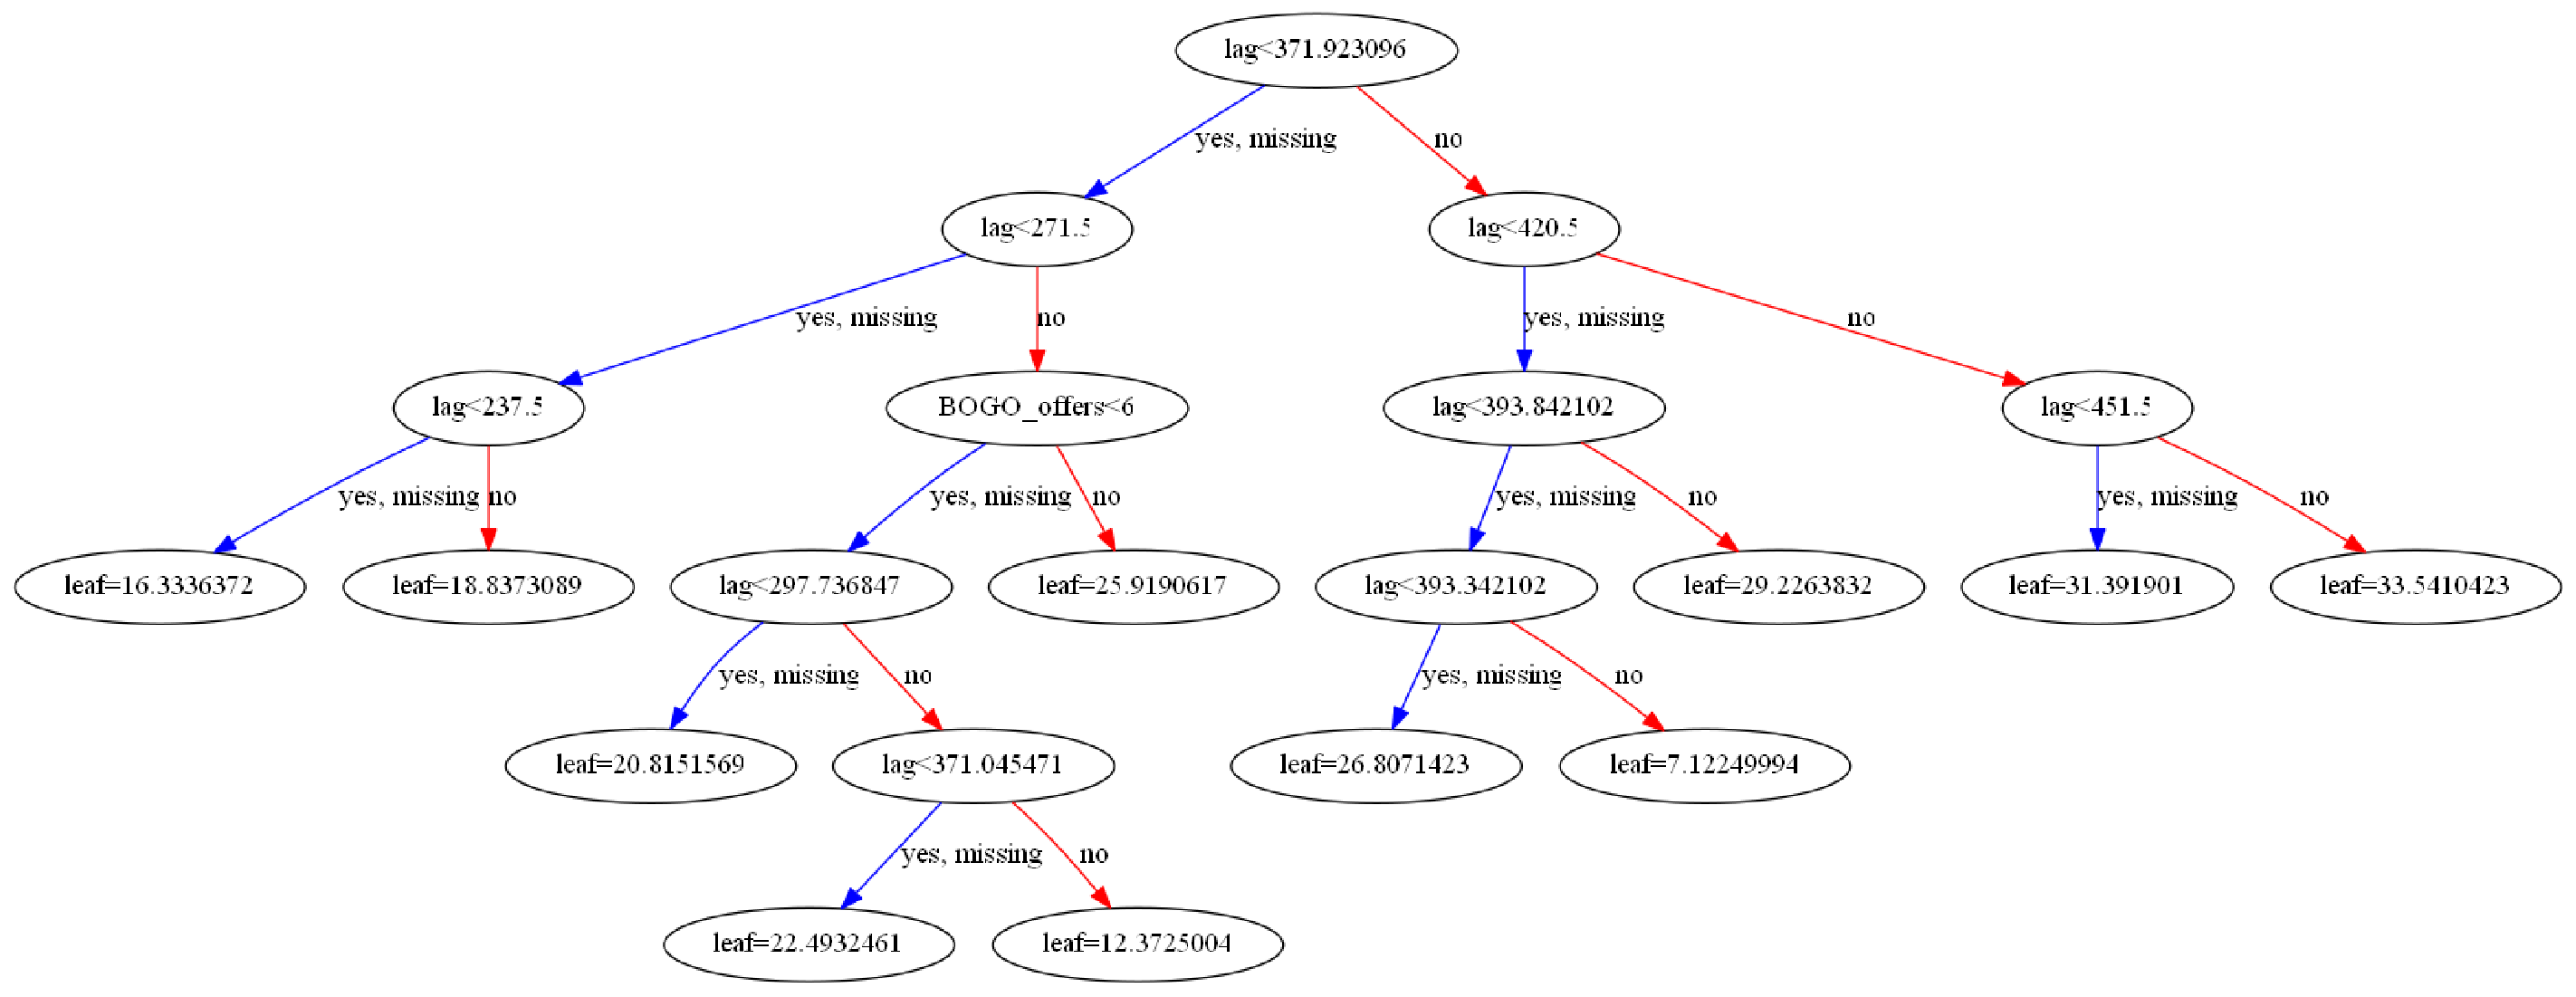

In [144]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [200, 40]
plt.show()

In [141]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin'

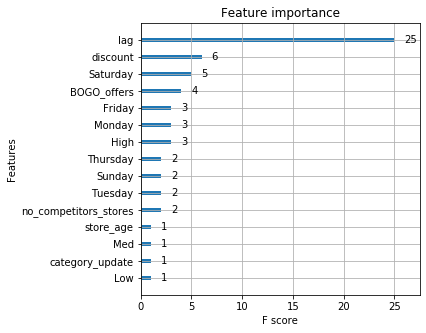

In [146]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()